# Lab | Data cleaning and wrangling

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

### 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [1]:
# import relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')


In [2]:
# read data into dataframe

data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [5]:
# function to create boxplot for all variables at once

def create_boxplot(df, cols= []):
    for col in cols:
        sns.boxplot(df[col])
        plt.show()

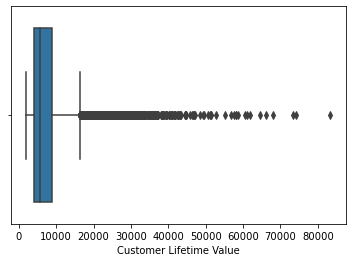

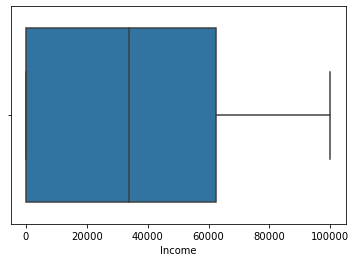

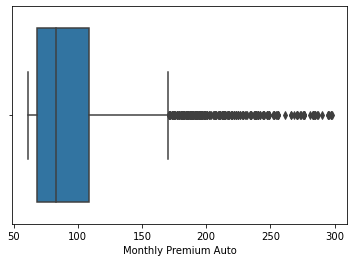

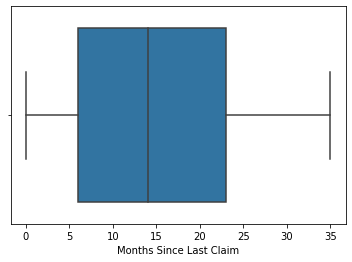

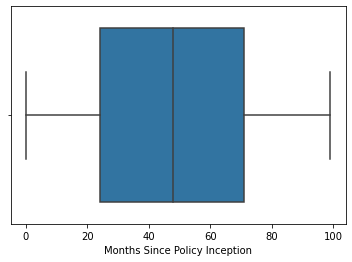

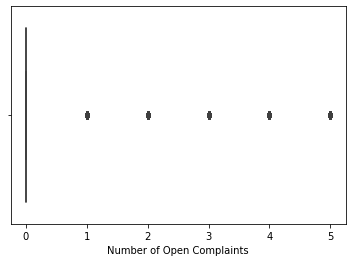

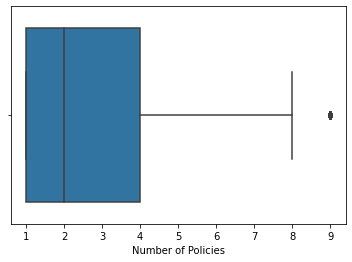

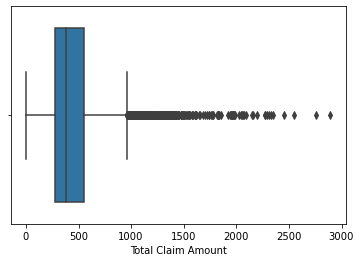

In [6]:
# use function on numeric columns to show outliers
create_boxplot(data,cols=data.select_dtypes(include=['int64','float64']).columns)

In [16]:
# fucntion to remove outliers

def IQR(data, columns = data.select_dtypes(include=['int64','float64']).columns, skip_columns=[]):
      for col in columns:
            if col not in skip_columns:
              q1 = data[col].quantile(0.25)
              q3 = data[col].quantile(0.75)
              iqr = q3 - q1
              fence_low = q1 - 1.5 * iqr
              fence_high = q3 + 1.5 * iqr
              cleaned_data = data.loc[(data[col] > fence_low) & (data[col] < fence_high)]
      return cleaned_data

In [17]:
data_copy = IQR(data,skip_columns=['Months Since Last Claim','Months Since Policy Inception','Number of Policies','Number of Open Complaints'])


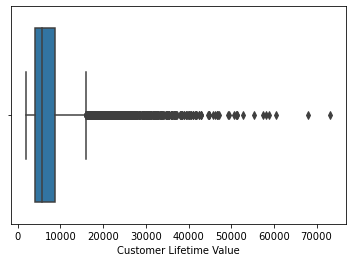

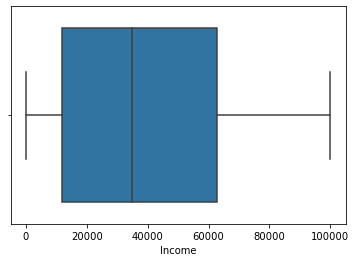

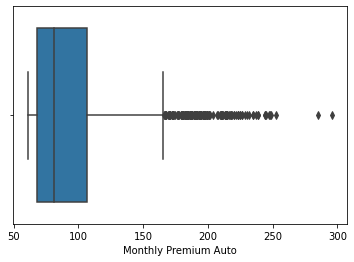

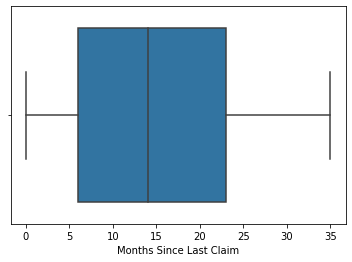

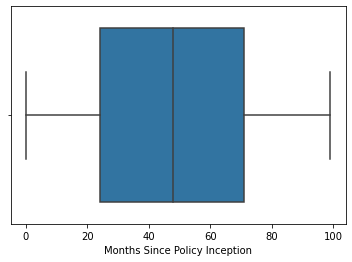

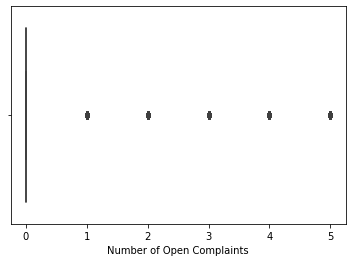

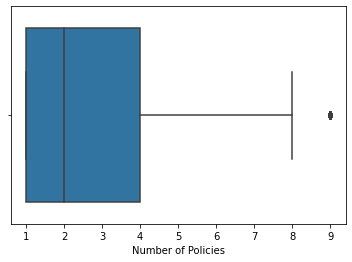

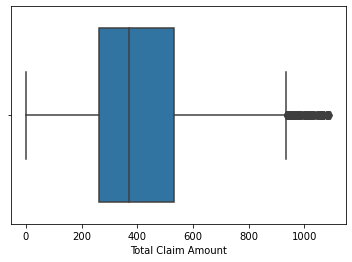

In [18]:
# as we can see the function I made doesn't actually work. No outliers are removed. Do you know why??

create_boxplot(data_copy,cols=data_copy.select_dtypes(include=['int64','float64']).columns)

### 2. Create a copy of the dataframe for the data wrangling.

In [19]:
numerical = data_copy.select_dtypes(include=['float64','int64'])
categorical = data_copy.select_dtypes(include='object')

### 3. Normalize the continuous variables. You can use any one method you want.

In [20]:
# will use min/max method

transformer = MinMaxScaler().fit(numerical)
x_min_max = transformer.transform(numerical)
x_min_max

array([[0.01213426, 0.56284694, 0.03404255, ..., 0.        , 0.        ,
        0.35178189],
       [0.15406898, 0.48776267, 0.2       , ..., 0.        , 0.125     ,
        0.51789333],
       [0.08058348, 0.        , 0.19148936, ..., 0.        , 0.75      ,
        0.4844345 ],
       ...,
       [0.08784611, 0.        , 0.10212766, ..., 0.6       , 0.125     ,
        0.72300554],
       [0.07888121, 0.2194517 , 0.14893617, ..., 0.        , 0.25      ,
        0.63194474],
       [0.01000771, 0.        , 0.06808511, ..., 0.        , 0.        ,
        0.33787278]])

### 4. Encode the categorical variables

In [21]:
# should have set the customer_id to index to avoid having 8000 columns :)

categorical = pd.get_dummies(categorical, drop_first=True) # i'm lazy
categorical

,Customer_AA16582,Customer_AA30683,Customer_AA35519,Customer_AA56476,Customer_AA69265,Customer_AA71604,Customer_AA93585,Customer_AB13432,Customer_AB21519,Customer_AB23825,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [22]:
data['Effective To Date']

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: Effective To Date, Length: 9134, dtype: object

In [23]:
# function to extract year from column

def year(x):
    pattern = '.{4,}(\d\d)'
    yr = re.findall(pattern,x)[0]
    return int(yr)

In [34]:
# function to extract day from column

def day(x):
    pattern = '.{2}(\d\d)'
    day = re.findall(pattern,x)[0]
    return int(day)

In [37]:
# function to extract month from column

def month(x):
    pattern = '\d'
    month = re.findall(pattern,x)[0]
    return int(month)

In [35]:
data['day'] = data['Effective To Date'].apply(day)
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,day_of_the_week,day
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,24
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,31
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,19
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,20
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2,10
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2,12
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2,11
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2,11


In [38]:
data['month'] = data['Effective To Date'].apply(month)
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,day_of_the_week,day,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,24,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,31,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,19,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,20,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2,10,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2,12,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2,11,2
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2,11,2


In [40]:
data['year'] = data['Effective To Date'].apply(year)
data

# now we have 3 new columns with the day, month and year extracted from the effective to date column

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,day,month,year
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,2,11
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,31,1,11
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,2,11
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,1,11
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,11,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,10,2,11
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,12,2,11
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,11,2,11
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,11,2,11


### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [44]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8831 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        8831 non-null   float64
 1   Income                         8831 non-null   int64  
 2   Monthly Premium Auto           8831 non-null   int64  
 3   Months Since Last Claim        8831 non-null   int64  
 4   Months Since Policy Inception  8831 non-null   int64  
 5   Number of Open Complaints      8831 non-null   int64  
 6   Number of Policies             8831 non-null   int64  
 7   Total Claim Amount             8831 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 620.9 KB


In [45]:
# categoricals encoded above but too many columns to show because i forgot to set the customer_id to index

categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8831 entries, 0 to 9133
Columns: 8931 entries, Customer_AA16582 to Vehicle Size_Small
dtypes: uint8(8931)
memory usage: 75.3 MB
